<a href="https://colab.research.google.com/github/SuperShekS/machine-learning/blob/main/MNIST%20classification%20using%20ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [2]:
# Load in the data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [3]:
# Build 
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [4]:
# Compile 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# Train 
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0409 - accuracy: 0.9862 - val_loss: 0.0735 - val_accuracy: 0.9792
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0393 - accuracy: 0.9862 - val_loss: 0.0712 - val_accuracy: 0.9799
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0363 - accuracy: 0.9874 - val_loss: 0.0710 - val_accuracy: 0.9811
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0325 - accuracy: 0.9888 - val_loss: 0.0695 - val_accuracy: 0.9812
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0338 - accuracy: 0.9884 - val_loss: 0.0739 - val_accuracy: 0.9810
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0297 - accuracy: 0.9898 - val_loss: 0.0793 - val_accuracy: 0.9795
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0302 - accuracy: 0.9896 - val_loss: 0.0766 - val_accuracy:

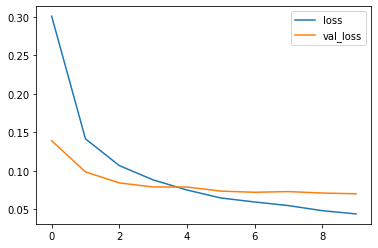

In [6]:
# Plot loss per iteration for FIRST TRAIN 
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

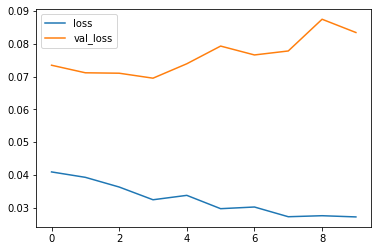

In [10]:
# Plot loss per iteration for SECOND TRAIN
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

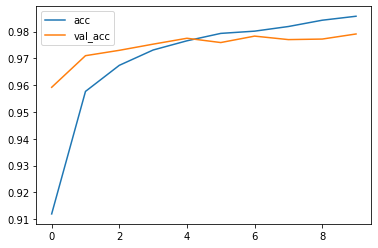

In [8]:
# Plot accuracy per iteration for FIRST TRAIN
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

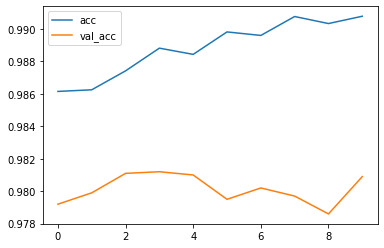

In [11]:
# Plot accuracy per iteration for SECOND TRAIN
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [12]:
# Evaluate the model
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 0s 1ms/step - loss: 0.0834 - accuracy: 0.9809
[0.08343500643968582, 0.98089998960495]


Confusion matrix, without normalization
[[ 968    0    0    0    2    2    4    1    3    0]
 [   0 1127    2    0    0    2    3    1    0    0]
 [   3    2 1009    2    1    0    2    4    8    1]
 [   0    0    3  987    0   10    0    4    0    6]
 [   1    0    1    0  965    0    2    0    2   11]
 [   2    1    0    6    2  873    2    1    2    3]
 [   4    2    1    1    2    7  941    0    0    0]
 [   1    0    9    3    1    0    0 1006    1    7]
 [   5    0    1    4    4    4    4    4  943    5]
 [   1    2    0    3    8    1    0    3    1  990]]


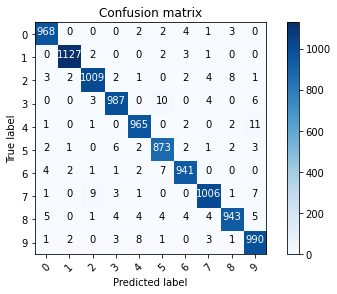

In [13]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc. 

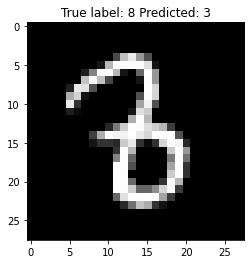

In [14]:
# misclassified
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));